In [1]:
from IPython.core.display import HTML, Image, display

# Run this cell to apply styling
custom_style_file = 'styles/ricardo_stylesheet.css'
styles = open(custom_style_file, 'r').read()
HTML(styles)

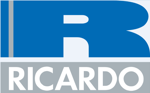

In [2]:
Image(filename = 'styles/ricardo_logo.png', width = 80, embed = True)


<hr>

# Introduction to Python and its Numerical Stack




We will refer to the Python 3 [documentation](https://docs.python.org/3/).

<i> This notebook is adapted from Harvard CS109a material </i>

In [95]:
display(HTML('''<div class = "todo"> 
    <b>Before you start, check that you have followed the other guidance:</b> <br>
    Go to the GitHub repository: <a href https://github.com/genagibson/ricardo_template_style> https://github.com/genagibson/ricardo_template_style </a> <br>
    Right click on '01_ricardo_template_style.html', select `save link as` and view in your browser, since GitHub will not render the html <br>
    (check it is the html file, rather than the ipynb file)
</div>'''))

## Getting Started

### Importing modules
All notebooks should begin with code that imports *modules*, collections of built-in, commonly-used Python functions.  Below we import the Numpy module, a fast numerical programming library for scientific computing.  Future labs will require additional modules, which is imported with the same `import MODULE_NAME as MODULE_NICKNAME` syntax.

In [4]:
import numpy as np #imports a fast numerical programming library

At Ricardo, commonly used libraries are:


In [5]:
import os

# Numerical python
import numpy as np
import pandas as pd

# iPython display
from IPython.core.display import HTML, Image, display

# Static plotting
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-white')

import seaborn as sns

# Interactive plotting
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.set_config_file(offline=True, world_readable=False, theme='white')

# Other Helpful fucntions
import itertools
import warnings

When trying to import any of these libraries, you will encounter errors if they are not installed in your active environment. You can access the command line from within the notebook using `!`, and install missing libraries using pip. Run the following command in a code cell to install or upgrade libraries:

    !pip install <library> --upgrade

More advanced libraries for specialised applications:
* sklearn for most machine learning models
* stats models for OLS
* keras/tensorflow for deep learning

### Calculations and variables

In [6]:
# // is integer division
1/2, 1//2, 1.0/2.0, 3*3.2

(0.5, 0, 0.5, 9.600000000000001)

The last line in a cell is returned as the output value, as above.  For cells with multiple lines of results, we can display results using `print`.

In [7]:
print(1 + 3.0)
5/3

4.0


1.6666666666666667


#### Pointers

Let's assign a list to the variable a (more about what a list is later):

In [8]:
a = [1, 2, 3]

Think of a variable as a label for a value, not a box in which you put the value

In [9]:
# set b = a
b = a

# Check the value of b
b

[1, 2, 3]

This DOES NOT create a new copy of `a`. It merely puts a new label (`b`) on the memory at `a`, as can be seen by the following code:

In [10]:
# These are the values of a and b 
print("a", a)
print("b", b)

# Let's change the second element of a to 7 instead of 2
a[1] = 7

# As expected, the value of a changes...
print("a after change", a)

# But also the value of b changed! 
print("b after change", b)

a [1, 2, 3]
b [1, 2, 3]
a after change [1, 7, 3]
b after change [1, 7, 3]


In [11]:
display(HTML('''<div class = "commenter1"> 

This behaviour catches a lot of new coders off-guard. Please be aware of it! 

</div>'''))

#### Tuples

Multiple items on one line in the interface are returned as a *tuple*, an immutable sequence of Python objects.

In [12]:
# A tuple can have any number of items in the sequence
a = 1
b = 2.0
a + a, a - b, b * b, 10*a

(2, -1.0, 4.0, 10)

We can obtain the type of a variable or use boolean comparisons to test these types. 

In [13]:
# Get variable types
type(a), type(b)

(int, float)

## Lists

Much of Python is based on the notion of a list.  In Python, a list is a sequence of items separated by commas, all within square brackets.  The items can be integers, floating points, or another type.  Unlike in C arrays, items in a Python list can be different types, so Python lists are more versatile than traditional arrays in C or in other languages. 

Let's start out by creating a few lists.  

In [14]:
empty_list = []
float_list = [1., 3., 5., 4., 2.]
int_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
mixed_list = [1, 2., 3, 4., 5]
print(empty_list)
print(int_list)
print(mixed_list, float_list)

[]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2.0, 3, 4.0, 5] [1.0, 3.0, 5.0, 4.0, 2.0]


Lists in Python are zero-indexed, as in C.  The first entry of the list has index 0, the second has index 1, and so on.

In [15]:
print(int_list[0])
print(float_list[1])

1
3.0


What happens if we try to use an index that doesn't exist for that list?  Python will complain!

You can find the length of a list using the builtin function `len`:

In [16]:
print(float_list)
len(float_list)

[1.0, 3.0, 5.0, 4.0, 2.0]


5

### Indexing on lists

The last element of `float_list` is

In [17]:
float_list[-1]

2.0

We can use the ``:`` operator to access a subset of the list.  This is called *slicing.* 

In [18]:
print(float_list[1:5])
print(float_list[0:2])

[3.0, 5.0, 4.0, 2.0]
[1.0, 3.0]


You can slice backwards as well:

In [19]:
float_list[:-2] # up to second last

[1.0, 3.0, 5.0]

In [20]:
float_list[:4] # up to but not including 5th element

[1.0, 3.0, 5.0, 4.0]

You can also slice with a stride:

In [21]:
float_list[:4:2] # above but skipping every second element

[1.0, 5.0]

We can iterate through a list using a loop:

In [22]:
for i in float_list:
    print(i)

1.0
3.0
5.0
4.0
2.0


Or, if we like, we can iterate through a list using the indices using a for loop with  `in range`. This is not idiomatic and is not recommended, but accomplishes the same thing as above.

In [23]:
for i in range(len(float_list)):
    print(float_list[i])

1.0
3.0
5.0
4.0
2.0


What if you wanted the index as well?

Use the built-in python method `enumerate`,  which can be used to create a list of tuples with each tuple of the form `(index, value)`. 

In [24]:
for index, value in enumerate(float_list):
    print(index, value)

0 1.0
1 3.0
2 5.0
3 4.0
4 2.0


In [25]:
# or make a list from it using the list constructor
list(enumerate(float_list))

[(0, 1.0), (1, 3.0), (2, 5.0), (3, 4.0), (4, 2.0)]

### Appending and deleting

We can also append items to the end of the list using the `+` operator or with `append`.

In [26]:
float_list + [.333]

[1.0, 3.0, 5.0, 4.0, 2.0, 0.333]

In [27]:
float_list.append(.444)

In [28]:
print(float_list)
len(float_list)

[1.0, 3.0, 5.0, 4.0, 2.0, 0.444]


6

Go and run the cell with `float_list.append` a second time.  Then run the next line.  What happens?  

To remove an item from the list, use `del.`

In [29]:
del(float_list[2])
print(float_list)

[1.0, 3.0, 4.0, 2.0, 0.444]


### List Comprehensions

Lists can be constructed in a compact way using a *list comprehension*.  Here's a simple example.

In [30]:
squaredlist = [i*i for i in int_list]
squaredlist

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

And here's a more complicated one, requiring a conditional.

In [31]:
comp_list1 = [2*i for i in squaredlist if i % 2 == 0]
print(comp_list1)

[8, 32, 72, 128, 200]


This is entirely equivalent to creating `comp_list1` using a loop with a conditional, as below:

In [32]:
comp_list2 = []
for i in squaredlist:
    if i % 2 == 0:
        comp_list2.append(2*i)
        
print(comp_list2)

[8, 32, 72, 128, 200]


The list comprehension syntax

```
[expression for item in list if conditional]

```

is equivalent to the syntax

```
for item in list:
    if conditional:
        expression
```

In [33]:
display(HTML('''<div class = "commenter1"> 

List comprehensions are very fast. You can make huge efficiency gains by using them instead of for loops.
</div>'''))

## Introduction to Numpy
Scientific Python code uses a fast array structure, called the numpy array. Those who have worked in Matlab will find this very natural.   For reference, the numpy documention can be found [here](https://docs.scipy.org/doc/numpy/reference/).  


In [34]:
display(HTML('''<div class = "commenter1"> 
    Python lists may contain items of different types. This flexibility comes at a price: Python lists store pointers to memory locations. On the other hand, numpy arrays are typed, where the default type is floating point. Because of this, the system knows how much memory to allocate based on the type. This makes access extremely fast!
    </div>'''))


Let's make a numpy array.

In [35]:
my_array = np.array([1, 2, 3, 4])
my_array

array([1, 2, 3, 4])

In [36]:
# works as in lists
len(my_array)

4

The shape array of an array is very useful (we'll see more of it later when we talk about 2D and higher dimensional arrays).

In [37]:
my_array.shape

(4,)

Numpy arrays are **typed**. This means that by default, all the elements will be assumed to be of one type

In [38]:
my_array.dtype

dtype('int64')

Numpy arrays are listy (i.e. they act like lists)! Below we compute length, slice, and iterate. 

In [39]:
print(len(my_array))
print(my_array[2:4])
for ele in my_array:
    print(ele)

4
[3 4]
1
2
3
4



You can calculate the mean of the array elements either by calling the method `.mean` on a numpy array or by applying the function np.mean with the numpy array as an argument.

In [40]:
print(my_array.mean())
print(np.mean(my_array))

2.5
2.5


In [41]:
display(HTML('''<div class = "commenter1"> 

In general you should manipulate numpy arrays by using numpy module functions (`np.mean`, for example). This is for efficiency purposes.

</div>'''))

The way we constructed the numpy array above seems redundant. After all we already had a regular python list. Indeed, it is the other ways we have to construct numpy arrays that make them super useful. 

There are many such numpy array *constructors*. Here are some commonly used constructors. Look them up in the documentation.

In [42]:
np.ones(10) # generates 10 floating point ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Numpy gains a lot of its efficiency from being typed. That is, all elements in the array have the same type, such as integer or floating point. The default type, as can be seen above, is a float of size appropriate for the machine (64 bit on a 64 bit machine).

In [43]:
np.dtype(float).itemsize # in bytes

8

In [44]:
np.ones(10, dtype='int') # generates 10 integer ones

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Often you will want random numbers. Use the `random` constructor!

In [46]:
np.random.random(10) # uniform on [0,1]

array([0.48480231, 0.76235339, 0.32466226, 0.54511148, 0.96829022,
       0.77379116, 0.90525465, 0.01499879, 0.36034266, 0.59672487])

You can generate random numbers from a normal distribution with mean 0 and variance 1:

In [47]:
normal_array = np.random.randn(1000)
print("The sample mean and standard devation are %f and %f, respectively." %(np.mean(normal_array), np.std(normal_array)))

The sample mean and standard devation are 0.055462 and 1.004911, respectively.


You can sample with and without replacement from an array. Lets first construct a grid:

In [48]:
grid = np.arange(0., 1.01, 0.1)
grid

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Without replacement

In [49]:
np.random.choice(grid, 5, replace=False)

array([0.1, 0.9, 1. , 0.2, 0.7])

With replacement:

In [50]:
np.random.choice(grid, 12, replace=True)

array([0.4, 0.3, 0.3, 0.1, 0.8, 0.7, 0.3, 1. , 0.4, 0.7, 0.3, 0.3])

### Numpy supports vector operations

What does this mean? It means that instead of adding two arrays, element by element, you can just say: add the two arrays. Note that this behavior is very different from python lists.

In [51]:
first = np.ones(5)
second = np.ones(5)
first + second

array([2., 2., 2., 2., 2.])

In [52]:
first_list = [1., 1., 1., 1., 1.]
second_list = [1., 1., 1., 1., 1.]
first_list + second_list #not what you want

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

On some computer chips this addition actually happens in parallel, so speedups can be high. But even on regular chips, the advantage of greater readability is important.

Numpy supports a concept known as *broadcasting*, which dictates how arrays of different sizes are combined together. There are too many rules to list here, but importantly, multiplying an array by a number multiplies each element by the number. Adding a number adds the number to each element.

In [53]:
first + 1

array([2., 2., 2., 2., 2.])

In [54]:
first*5

array([5., 5., 5., 5., 5.])

This means that if you wanted the distribution $N(5, 7)$ you could do:

In [55]:
normal_5_7 = 5 + 7*normal_array
np.mean(normal_5_7), np.std(normal_5_7)

(5.388230524175895, 7.034373727327416)

Multiplying two arrays multiplies them element-by-element

In [56]:
(first +1) * (first*5)

array([10., 10., 10., 10., 10.])

You might have wanted to compute the dot product instead:

In [57]:
np.dot((first +1) , (first*5))

50.0

You can also use the @ operator for this purpose

In [58]:
(first +1) @ (first*5)

50.0

##  Simple Functions

A *function* object is a reusable block of code that does a specific task.  Functions are all over Python, either on their own or on other objects.  To invoke a function `func`, you call it as `func(arguments)`.

Whenever code is used across multiple notebooks, it's good practice to extract it as a .py function and call it within the notebook.

### Methods
A function that belongs to an object is called a *method*. By "object" here we mean an "instance" of a list, or integer, or floating point variable.

An example of this is `append` on an existing list. In other words, a *method* is a function on an *instance* of a type of object (also called *class*, in this case, list type).


In [59]:
float_list = [1.0, 2.09, 4.0, 2.0, 0.444]
print(float_list)
float_list.append(56.7) 
float_list

[1.0, 2.09, 4.0, 2.0, 0.444]


[1.0, 2.09, 4.0, 2.0, 0.444, 56.7]

### User-defined functions

We'll now learn to write our own user-defined functions.  Below is the syntax for defining a basic function with one input argument and one output. You can also define functions with no input or output arguments, or multiple input or output arguments.

```
def name_of_function(arg):
    ...
    return(output)
```

We can write functions with one input and one output argument.  Here are two such functions.

In [60]:
def square(x):
    x_sqr = x*x
    return(x_sqr)

def cube(x):
    x_cub = x*x*x
    return(x_cub)

square(5),cube(5)

(25, 125)

What if you want to return two variables at a time? The usual way is to return a tuple:

In [61]:
def square_and_cube(x):
    x_cub = x*x*x
    x_sqr = x*x
    return(x_sqr, x_cub)

square_and_cube(5)

(25, 125)

### Lambda functions

Often we quickly define mathematical functions with a one-line function called a *lambda* function.  Lambda functions are great because they enable us to write functions without having to name them, ie, they're *anonymous*.  
No return statement is needed. 

In [62]:
# create an anonymous function and assign it to the variable square
square = lambda x: x*x
print(square(3))


hypotenuse = lambda x, y: x*x + y*y

## Same as

# def hypotenuse(x, y):
#     return(x*x + y*y)

hypotenuse(3,4)

9


25

## Regressions using statsmodels and sklearn

There are two main libraries we recommend for modelling:

* statsmodels tends to be easier for inference [finding the values of the slope and intercept and dicussing uncertainty in those values], 
* sklearn has machine-learning algorithms and is better for prediction [guessing y values for a given x value].

### Data exploration

Standard practice before diving into regressions is to do a bit of exploratory analysis. Below are a few examples of useful things to try. 


In [86]:
# import example data
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head().style.set_caption('Example data from the iris dataframe')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5,3.6,1.4,0.2,setosa


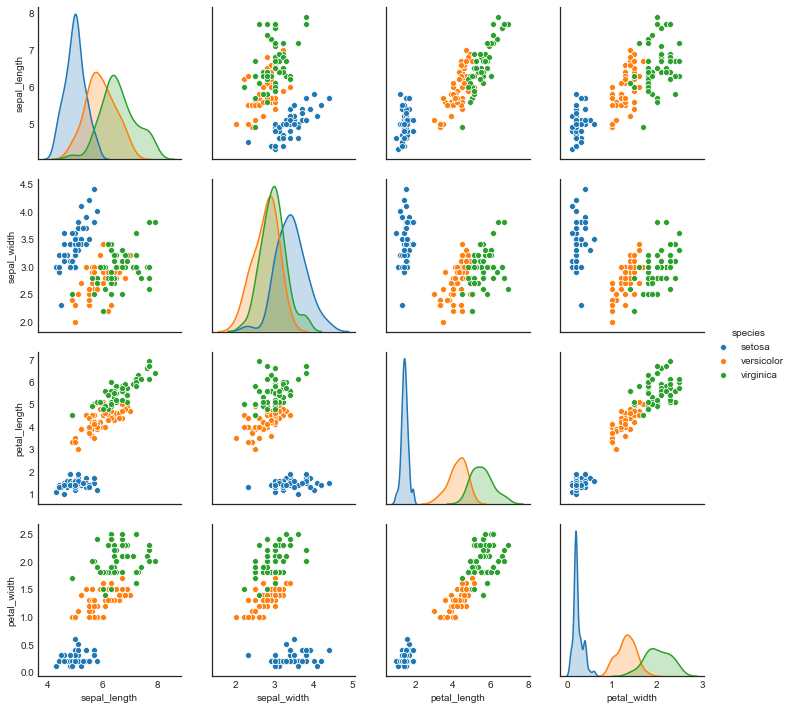

In [92]:
# We can create a scatterplot matrix
# And use hue to explore some of the categorical variables
display(HTML('<figcaption> Scatterplot matrix </figcaption>'))
sns.pairplot(iris, hue = 'species');

In [85]:
# Generate statistical summaries
iris.describe().style.set_caption('Statistical summary')

,sepal_length,sepal_width,petal_length,petal_width
count,150,150,150,150
mean,5.84333,3.05733,3.758,1.19933
std,0.828066,0.435866,1.7653,0.762238
min,4.3,2,1,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3,4.35,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


### Statsmodels

Although `sklearn` does the heavy lifting of machine learning, sometimes good old regression is needed. For this, I recommend using `statsmodels` since it outputs a lot of diagnostic information.


In [64]:
# Import statsmodels
import statsmodels.api as sm

# Decide on the y variable
y = iris['sepal_length']

# Decide on the X variables
X = iris[['sepal_width', 'petal_length', 'petal_width']] # use double brackets to select multiple columns

In [65]:
# To include an intercept in the model, you need to manually add a constant
X_const = sm.add_constant(X)
X_const.head().style.set_caption('Data with an added constant for the intercept')

,const,sepal_width,petal_length,petal_width
0,1,3.5,1.4,0.2
1,1,3,1.4,0.2
2,1,3.2,1.3,0.2
3,1,3.1,1.5,0.2
4,1,3.6,1.4,0.2


In [66]:
# Build the OLS model
model = sm.OLS(y, X_const)

# fit and save the regression parameters
results = model.fit()

# View the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     295.5
Date:                Wed, 19 Jun 2019   Prob (F-statistic):           8.59e-62
Time:                        11:37:35   Log-Likelihood:                -37.321
No. Observations:                 150   AIC:                             82.64
Df Residuals:                     146   BIC:                             94.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.8560      0.251      7.401      0.000       1.360       2.352
sepal_width      0.6508      0.067      9.765      0.000       0.519       0.783
petal_length     0.7091      0.057     12.502      0.000       0.597       0.821
petal_width     -0.5565      0.128     -4.363      0.000      -0.809      -0.304
==============================================================================
Omnibus:                        0.345   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.504
Skew:                           0.007   Prob(JB):                        0.777
Kurtosis:                       2.716   Cond. No.                         54.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The outputs you see above are stored in the `results` variable and can be accessed using dot notation. Try typing results. and then pressing tab to see all of the options.

In [87]:
# Access specific items:
results.rsquared # R2 value

0.8586117200663178

In [89]:
results.params['sepal_width'] # Parameter estimate for sepal_width

0.650837159313217

Diagnostic plots can be automatically generated with Seaborn

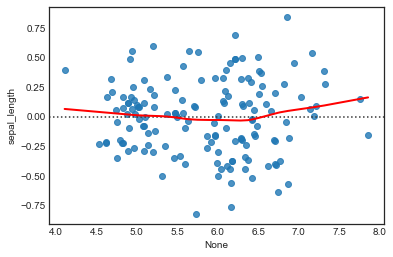

In [93]:
display(HTML('<figcaption> Residual plot </figcaption>'))
plot_resid = sns.residplot(results.fittedvalues, y, 
                          lowess = True, 
                          scatter_kws = {"alpha": 0.8}, 
                          line_kws = {"color": "r", "lw": 2})

Statsmodels also has logistic regression, among many others.

### Sklearn

We can achieve the same model with sklearn, but it does not output the summary tables above. Somewhat confusingly, the API requires that X and y and the other way around. 

In [67]:
# Import OLS from sklearn
from sklearn.linear_model import LinearRegression

# Initialise the model
regression = LinearRegression()

# Fit the model. This time, there is no need to add a constant. 
model = regression.fit(X, y)

# We can use this model for prediction, but we can't get the sumamry table above.
r2 = regression.score(X, y)
r2

0.8586117200663176

In [94]:
display(HTML('''<div class = "commenter1"> 

sklearn is not recommended for statistics that require interpretation. Use it for machine learning / prediction.

</div>'''))


## Introduction to Pandas 

Often data is stored in comma separated values (CSV) files.    For the remainder of this lab, we'll be working with [automobile data](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html), where we've extracted relevant parts below.

Note that CSV files can be output by any spreadsheet software, and are plain text, hence are a great way to share data. 

### Importing data with pandas

Now let's read in our automobile data as a pandas *dataframe* structure.  

In [68]:
import pandas as pd

In [69]:
# Read in the csv files
dfcars=pd.read_csv('files/mtcars.txt')
type(dfcars)

pandas.core.frame.DataFrame

In [70]:
dfcars.head().style.set_caption('Raw imported table')

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108,93,3.85,2.32,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360,175,3.15,3.44,17.02,0,0,3,2


What we have now is a spreadsheet with indexed rows and named columns, called a *dataframe* in pandas.  `dfcars` is an *instance* of the pd.DataFrame *class*, created by calling the pd.read_csv "constructor function".

The take-away is that `dfcars` is a dataframe object, and it has methods (functions) belonging to it. For example, `df.head()` is a method that shows the first 5 rows of the dataframe.

A pandas dataframe is a set of columns pasted together into a spreadsheet, as shown in the schematic below, which is taken from the cheatsheet above.  The columns in pandas are called *series* objects.

![](images/pandastruct.png)

Let's look again at the first five rows of `dfcars`.  

In [71]:
dfcars.head().style.set_caption('Raw imported table')

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108,93,3.85,2.32,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360,175,3.15,3.44,17.02,0,0,3,2


Notice the poorly named first column: "Unnamed: 0". Why did that happen?

The first column, which seems to be the name of the car, does not have a name. Here are the first 3 lines of the file:

```    
"","mpg","cyl","disp","hp","drat","wt","qsec","vs","am","gear","carb"
"Mazda RX4",21,6,160,110,3.9,2.62,16.46,0,1,4,4
"Mazda RX4 Wag",21,6,160,110,3.9,2.875,17.02,0,1,4,4
```

Lets **clean** that up:

In [72]:
dfcars = dfcars.rename(columns={"Unnamed: 0": "name"})
dfcars.head().style.set_caption('Cleaned table')

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21,6,160,110,3.9,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108,93,3.85,2.32,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360,175,3.15,3.44,17.02,0,0,3,2


In the above, the argument `columns = {"Unnamed: 0": "name"}` of `rename` changed the name of the first column in the dataframe from `Unnamed: 0` to `name`. 

Lets save this cleaned dataframe out to a CSV file.

In [73]:
# dont store the 0,1,2,3,4.. index
dfcars.to_csv("files/cleaned-mtcars.csv", index=False, header=True)

The output will look something like this:

```
name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.9,2.62,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.32,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.44,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.46,20.22,1,0,3,1
```

To access a *series* (column), you can use either dictionary syntax or instance-variable syntax.

Dictionary syntax is very useful when column names have spaces: Python variables cannot have spaces in them.

In [74]:
dfcars.mpg

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

In [75]:
dfcars['mpg']

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

You can get a numpy array of values from the Pandas Series:

In [76]:
dfcars.mpg.values

array([21. , 21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8,
       16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5,
       15.2, 13.3, 19.2, 27.3, 26. , 30.4, 15.8, 19.7, 15. , 21.4])

And we can produce a histogram from these values

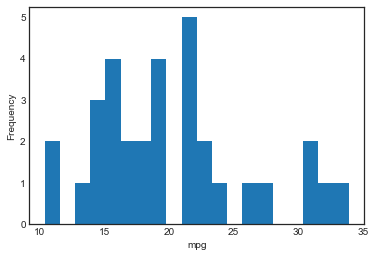

In [77]:
# the .values isnt really needed, a series behaves like a list for
# plotting purposes
display(HTML('<figcaption> Miles per gallon </figcaption>'))
plt.hist(dfcars.mpg.values, bins=20);
plt.xlabel("mpg");
plt.ylabel("Frequency");


We can also get sub-dataframes by choosing a set of series. We  pass a list of the columns we want as "dictionary keys" to the dataframe.  

In [78]:
dfcars[['am', 'mpg']].head().style.set_caption('Subset table')

,am,mpg
0,1,21
1,1,21
2,1,22.8
3,0,21.4
4,0,18.7


### Scatter plots
We often want to see co-variation among our columns, for example, miles/gallon versus weight.  This can be done with a scatter plot. 

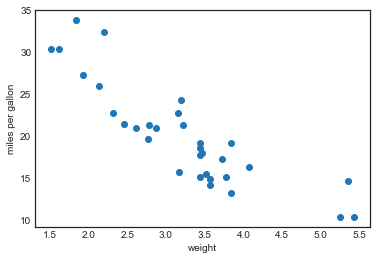

In [79]:
display(HTML('<figcaption> weight vs mpg </figcaption>'))
plt.scatter(dfcars.wt, dfcars.mpg);
plt.xlabel("weight");
plt.ylabel("miles per gallon");

Usually we use `plt.show()` at the end of every plot to display the plot. Our magical incantation `%matplotlib inline` takes care of this for us, and we don't have to do it in the Jupyter notebook. But if you run your Python program from a file, you will need to explicitly have a call to show. We include it for completion.

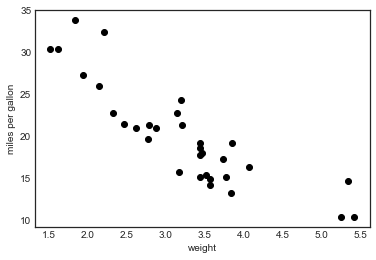

In [80]:
display(HTML('<figcaption> Using plt.show() </figcaption>'))
plt.plot(dfcars.wt, dfcars.mpg, 'ko')  #black dots
plt.xlabel("weight");
plt.ylabel("miles per gallon");
plt.show()

## More resources

This is a fantastic intro to python: [Jake's book](https://jakevdp.github.io/PythonDataScienceHandbook/).

If you want access to DataCamp tutorials, please contact Gena Gibson for the login details.

In [81]:
display(HTML('''
<hr> 
<div class = 'footnote'>
Contact gena.gibson@ricardo.com for suggestions <br>
Version last updated on 19 July 2019
</div>'''))